In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

In [78]:
N=128
dt=0.01
t=torch.arange(N)*dt

In [95]:
freq=5 # frequency in Hz
x=torch.sin(2*torch.pi*freq*t)
x_1=torch.sin(2*torch.pi*freq*t+7)

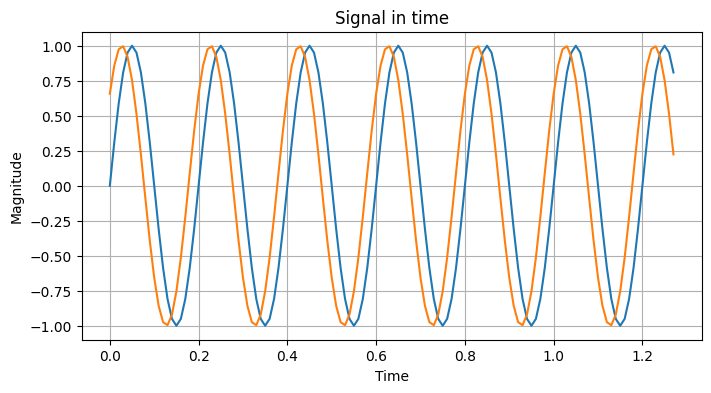

In [96]:
plt.figure(figsize=(8,4))
plt.plot(t,x)
plt.plot(t,x_1)
plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.title("Signal in time")
plt.grid(True)
plt.show()

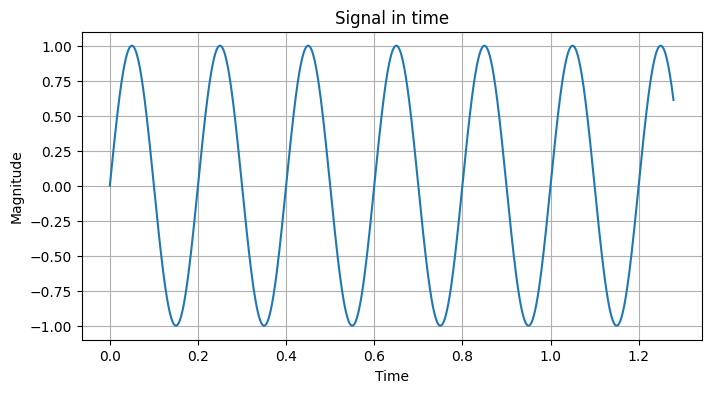

In [68]:
plt.figure(figsize=(8,4))
plt.plot(t,x)
plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.title("Signal in time")
plt.grid(True)
plt.show()

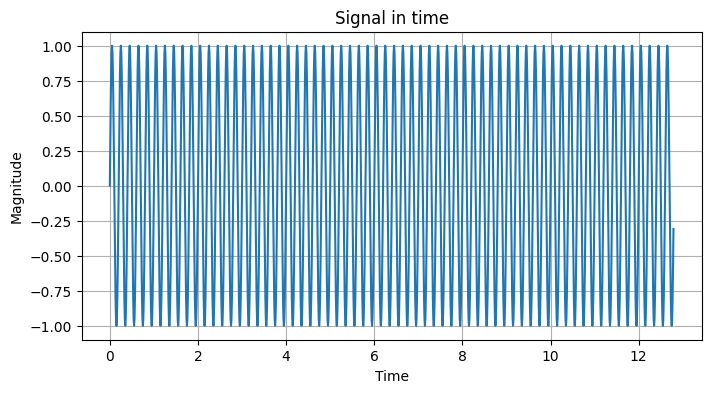

In [62]:
plt.figure(figsize=(8,4))
plt.plot(t,x)
plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.title("Signal in time")
plt.grid(True)
plt.show()

In [82]:
F = torch.zeros(N, dtype=torch.complex64) # Fourier coefficients there is as many of them as samples recorded

for k in range(N):
    sum_val = torch.tensor(0.0, dtype=torch.complex64)
    for n in range(N):
        # Make angle a tensor
        angle = torch.tensor(-2 * torch.pi * k * n / N, dtype=torch.float32)
        # Euler formula
        sum_val += x[n] * (torch.cos(angle) + 1j * torch.sin(angle))
    F[k] = sum_val

In [97]:
F_1 = torch.zeros(N, dtype=torch.complex64) # Fourier coefficients there is as many of them as samples recorded

for k in range(N):
    sum_val = torch.tensor(0.0, dtype=torch.complex64)
    for n in range(N):
        # Make angle a tensor
        angle = torch.tensor(-2 * torch.pi * k * n / N, dtype=torch.float32)
        # Euler formula
        sum_val += x_1[n] * (torch.cos(angle) + 1j * torch.sin(angle))
    F_1[k] = sum_val

In [84]:
freqs = torch.arange(N, dtype=torch.float32) / (N * dt)

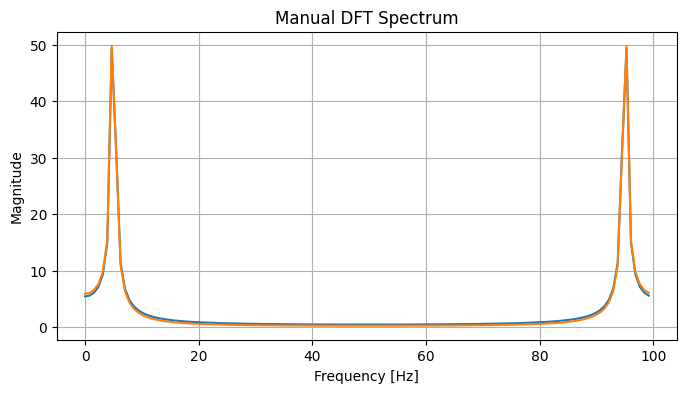

In [98]:
plt.figure(figsize=(8,4))
plt.plot(freqs, torch.abs(F))
plt.plot(freqs, torch.abs(F_1))
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.title("Manual DFT Spectrum")
plt.grid(True)
plt.show()

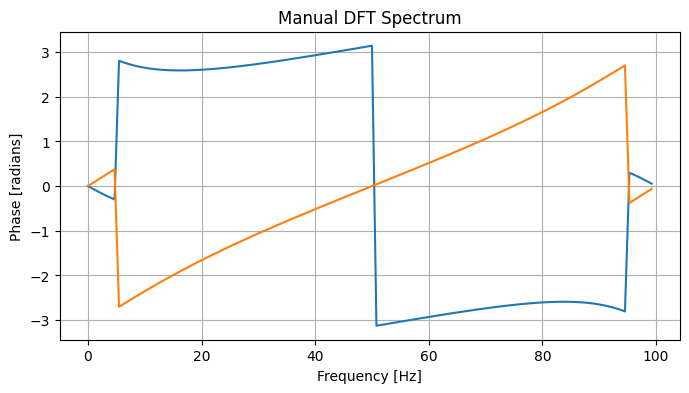

In [101]:
plt.figure(figsize=(8,4))
plt.plot(freqs, torch.angle(F))
plt.plot(freqs, torch.angle(F_1))
plt.xlabel("Frequency [Hz]")
plt.ylabel("Phase [radians]")
plt.title("Manual DFT Spectrum")
plt.grid(True)
plt.show()

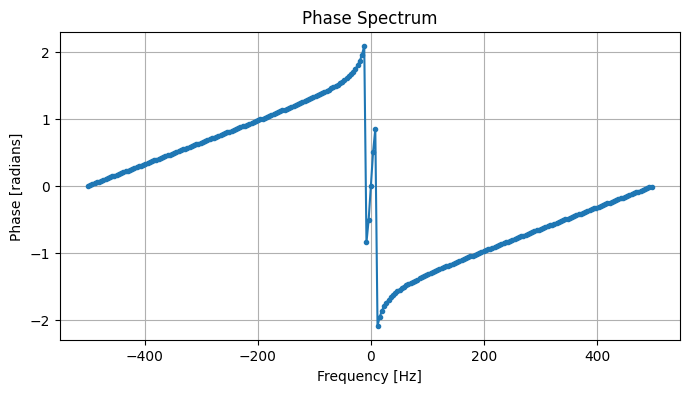

In [102]:
# --- Signal parameters ---
N = 256
dt = 0.001       # sampling interval [s]
t = torch.arange(N) * dt
f = 10           # frequency [Hz]
phi = torch.pi / 4  # phase shift (45 degrees)

# --- Create signal ---
x = torch.sin(2 * torch.pi * f * t + phi)

# --- Compute FFT ---
F = torch.fft.fft(x)
freqs = torch.fft.fftfreq(N, dt)

# --- Shift both frequency and spectrum for nicer plotting ---
F_shifted = torch.fft.fftshift(F)
freqs_shifted = torch.fft.fftshift(freqs)

# --- Compute magnitude and phase ---
magnitude = torch.abs(F_shifted)
phase = torch.angle(F_shifted)

# --- Plot phase spectrum ---
plt.figure(figsize=(8,4))
plt.plot(freqs_shifted, phase, '.-')
plt.title("Phase Spectrum")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Phase [radians]")
plt.grid(True)
plt.show()